# Linear regression on Wine Dataset (The Analytics Edge edX Course)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
wine=pd.read_csv("wine.csv")
winetest=pd.read_csv("wine_test.csv")

In [3]:
wine.head(5)

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


In [4]:
wine.describe()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1965.800000,7.067224,605.280000,16.509336,148.560000,17.200000,49694.436760
std,7.691987,0.650341,132.277965,0.675397,74.419464,7.691987,3665.270243
min,1952.000000,6.204900,376.000000,14.983300,38.000000,5.000000,43183.569000
25%,1960.000000,6.518800,536.000000,16.200000,89.000000,11.000000,46583.995000
50%,1966.000000,7.121100,600.000000,16.533300,130.000000,17.000000,50254.966000
75%,1972.000000,7.495000,697.000000,17.066700,187.000000,23.000000,52894.183000
max,1978.000000,8.493700,830.000000,17.650000,292.000000,31.000000,54602.193000


In [5]:
wine.columns

Index(['Year', 'Price', 'WinterRain', 'AGST', 'HarvestRain', 'Age',
       'FrancePop'],
      dtype='object')

Plotting the Dependent Variable(Price) against Individual features

Text(0,0.5,'Logarithm of (Price)')

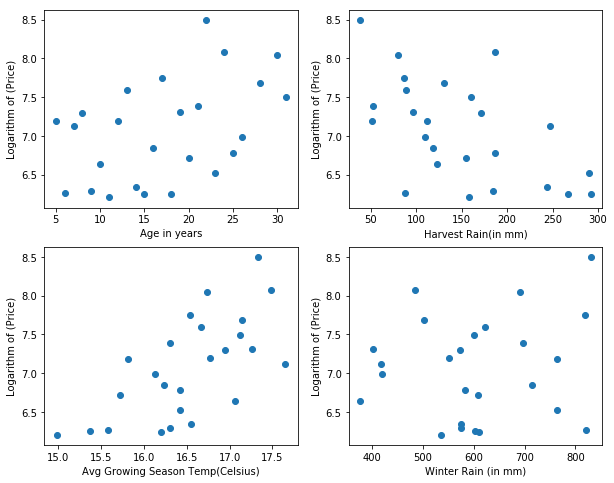

In [6]:
fig = plt.figure(figsize=(10,8)) 

plt.subplot(221)
plt.scatter(wine['Age'],wine['Price'])
plt.xlabel('Age in years')
plt.ylabel('Logarithm of (Price)')

plt.subplot(222)
plt.scatter(wine['HarvestRain'],wine['Price'])
plt.xlabel('Harvest Rain(in mm)')
plt.ylabel('Logarithm of (Price)')

plt.subplot(223)
plt.scatter(wine['AGST'], wine['Price'])
plt.xlabel('Avg Growing Season Temp(Celsius)')
plt.ylabel('Logarithm of (Price)')

plt.subplot(224)
plt.scatter(wine['WinterRain'], wine['Price'])
plt.xlabel('Winter Rain (in mm)')
plt.ylabel('Logarithm of (Price)')

Text(0,0.5,'Logarithm of (Price)')

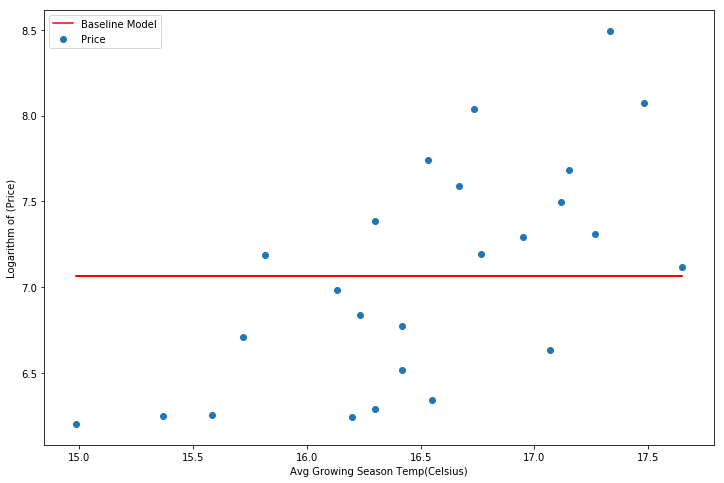

In [7]:
y=[np.mean(wine['Price'])] *25
fig = plt.figure(figsize=(12,8))
plt.scatter(wine['AGST'], wine['Price'])
plt.plot(wine['AGST'],y, color='r', label='Baseline Model')
pylab.legend(loc='upper left')
plt.xlabel('Avg Growing Season Temp(Celsius)')
plt.ylabel('Logarithm of (Price)')

In [8]:
mse= mean_squared_error(wine['Price'], y)
print(mse)
sse=mse*25
print(sse)

0.40602550902400003
10.150637725600001


### Correlation between various features

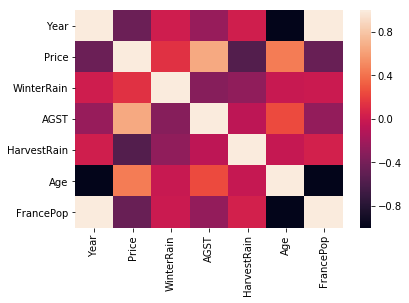

In [9]:
corr = wine.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [10]:
X_1=wine['AGST'].reshape(-1, 1)
Y_1=wine['Price'].reshape(-1, 1)
regressor=LinearRegression()
regressor.fit(X_1, Y_1) 

F:\ABooks\New folder\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
F:\ABooks\New folder\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
c=regressor.intercept_  
m=regressor.coef_
print(c)
print(m)
x=np.array(wine['AGST'])
z=m*x + c

[-3.41776131]
[[0.63509431]]


# # Plotting linear regression with 1 variable(AGST)

Text(0,0.5,'Logarithm of (Price)')

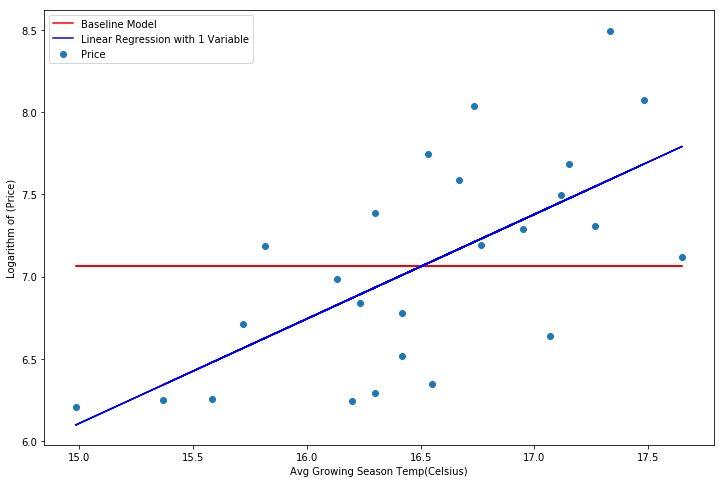

In [12]:
y=[np.mean(wine['Price'])] *25
fig = plt.figure(figsize=(12,8))
plt.scatter(wine['AGST'], wine['Price'])
plt.plot(wine['AGST'],y, color='r', label='Baseline Model')
pylab.legend(loc='upper left')
plt.plot(wine['AGST'], z.T, color='b', label='Linear Regression with 1 Variable')
pylab.legend(loc='upper left')
plt.xlabel('Avg Growing Season Temp(Celsius)')
plt.ylabel('Logarithm of (Price)')

In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(z.T, wine['Price']))  
print('Mean Squared Error:', metrics.mean_squared_error(z.T, wine['Price']))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(z.T, wine['Price']))) 
print('R squared Value :', r2_score(z.T, wine['Price']))

Mean Absolute Error: 0.39071000282576
Mean Squared Error: 0.22939500588080455
Root Mean Squared Error: 0.4789519870308553
R squared Value : -0.2987281460373401


-2.202653600949949
[ 0.60261691 -0.00457006]
0.602616906295316


Text(0,0.5,'Logarithm of (Price)')

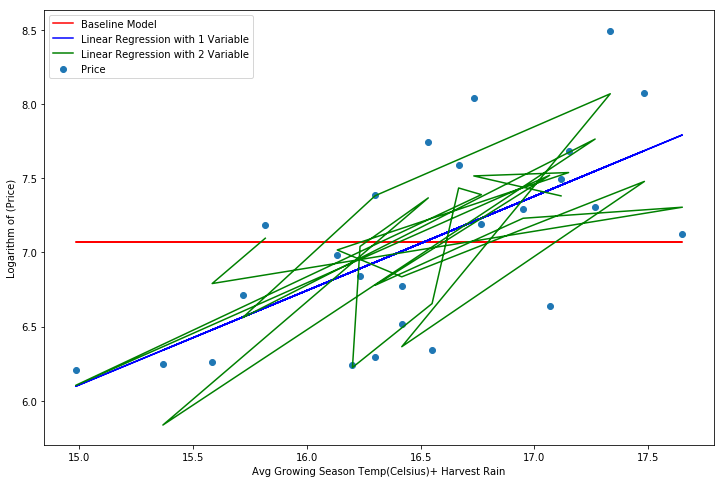

In [14]:
x1=np.array(wine['AGST'])
x2=np.array(wine['HarvestRain'])
X_2=wine[['AGST', 'HarvestRain']]
Y_2=wine['Price']
regressor_1=LinearRegression()
regressor.fit(X_2,Y_2)
c1=regressor.intercept_  
m1=regressor.coef_
print(c1)
print(m1)
x=np.array(wine['AGST'])
z1=m1[0]*x1 + m1[1]*x2+c1
print(m1[0])
y=[np.mean(wine['Price'])] *25
fig = plt.figure(figsize=(12,8))
plt.scatter(wine['AGST'], wine['Price'])
plt.plot(wine['AGST'],y, color='r', label='Baseline Model')
pylab.legend(loc='upper left')
plt.plot(wine['AGST'], z.T, color='b', label='Linear Regression with 1 Variable')
pylab.legend(loc='upper left')
plt.plot(wine['AGST'],z1.T ,color='g', label='Linear Regression with 2 Variable')
pylab.legend(loc='upper left')
plt.xlabel('Avg Growing Season Temp(Celsius)+ Harvest Rain')
plt.ylabel('Logarithm of (Price)')

In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(z1.T, wine['Price']))  
print('Mean Squared Error:', metrics.mean_squared_error(z1.T, wine['Price']))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(z1.T, wine['Price']))) 
print('R squared Value :', r2_score(z1.T, wine['Price'], multioutput='variance_weighted'))

Mean Absolute Error: 0.2668288171919501
Mean Squared Error: 0.11881493360694172
Root Mean Squared Error: 0.34469542150562676
R squared Value : 0.5863142106295682


# Regression model using 4 features using ols

In [16]:
regressor_model = smf.ols('Price ~ AGST + Age + HarvestRain + WinterRain', data=wine).fit()

In [19]:
print(regressor_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     24.17
Date:                Mon, 22 Oct 2018   Prob (F-statistic):           2.04e-07
Time:                        09:49:25   Log-Likelihood:                -2.1622
No. Observations:                  25   AIC:                             14.32
Df Residuals:                      20   BIC:                             20.42
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.4300      1.766     -1.942      

#### coef- Represents the coefficient of the variable in model.
#### std error-represents how much the coefficient can deviate
#### t- is std error/ coef, represents how significant a value is.If the absolute value of t is high, it is more likely to be significant.
#### P>|t| - represents possibilty of the coefficient being zero, given the data used to build the model. 

In [23]:
winetest.columns

Index(['Year', 'Price', 'WinterRain', 'AGST', 'HarvestRain', 'Age',
       'FrancePop'],
      dtype='object')

In [28]:
X_test=winetest[['AGST', 'Age','HarvestRain','WinterRain']]

In [29]:
y_pred=regressor_model.predict(X_test)

In [30]:
df = pd.DataFrame({'Actual': winetest['Price'], 'Predicted': y_pred}) 

# Predictions

In [31]:
df

,Actual,Predicted
0,6.9541,6.768925
1,6.4979,6.684910


In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(winetest['Price'], y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(winetest['Price'], y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(winetest['Price'], y_pred))) 


Mean Absolute Error: 0.1860928865054463
Mean Squared Error: 0.03463140424388193
Root Mean Squared Error: 0.18609514836201918


In [38]:
print('R squared value :',1-(metrics.mean_squared_error(winetest['Price'], y_pred)/metrics.mean_absolute_error(winetest['Price'], y_pred)))

R squared value : 0.8139025897539163
